In [2]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.special as sps
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
half_speed_n = [8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]
half_speed_d = [4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8, 8, 8]

In [27]:
def err_prob(n, d, p):
    threshold_err = int(np.floor((d - 1)/2))
    p_total = 0
    for x in range(n+1):
        if 2*x + 1 > d:
            p_total += sps.binom(n, x) * np.power(p, x) * np.power(1 - p, n - x)
    return p_total

[0.18689527000000003, 0.26390107090000015, 0.3409977482110001, 0.41537085948433011, 0.21075066030384562, 0.26620400521467102, 0.32307319481053415, 0.17192789706645592, 0.2142622390466099, 0.25905837319705116, 0.30543369690813277, 0.35256082820815232, 0.39969409753596635, 0.44618495182926582, 0.49148859463378075]


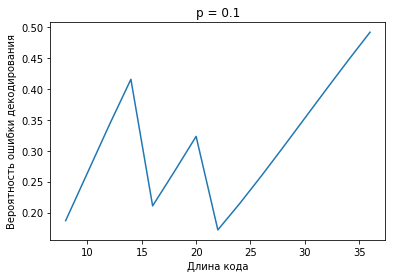

[0.0026900777395207007, 0.0042662002428314194, 0.0061745377728247459, 0.008401244011166176, 0.0005079424092904565, 0.0007291598430539493, 0.0010035761681001173, 6.3329513074303044e-05, 9.053764174621806e-05, 0.00012536403735841439, 0.0001689790943517606, 0.00022259789863339694, 0.00028747364479569275, 0.00036489143304660438, 0.000456162429675165]


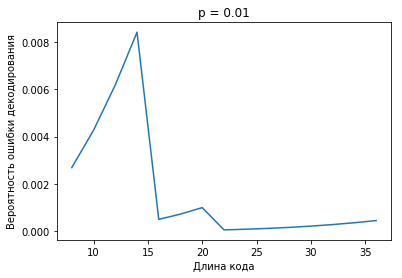

[2.7888209776139952e-05, 4.4760628993049274e-05, 6.5561481836615235e-05, 9.0274995006994397e-05, 5.5456612809133017e-07, 8.0687122283644235e-07, 1.1255576375601594e-06, 7.2104067302841504e-09, 1.0457323063588432e-08, 1.4689169198505095e-08, 2.0085623827597989e-08, 2.6840873238053698e-08, 3.5163490969455188e-08, 4.5276318080220853e-08, 5.741634402026116e-08]


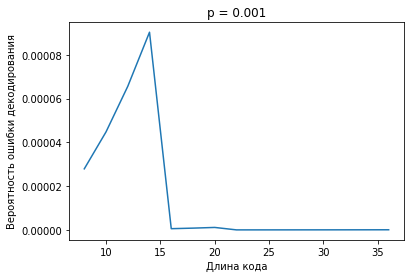

In [38]:
p_channels = [0.1, 0.01, 0.001]
half_speed_nd = list(zip(half_speed_n, half_speed_d))
for p_ch in p_channels:
    errs = list(map(lambda p: err_prob(p[0], p[1], p_ch), half_speed_nd))
    print(errs)
    plt.plot(half_speed_n, errs)
    plt.title("p = {}".format(p_ch))
    plt.ylabel("Вероятность ошибки декодирования")
    plt.xlabel("Длина кода")
    plt.show()

In [34]:
p_channel = 0.00001
sqrt_en = stats.norm.ppf(1 - p_channel)
en = sqrt_en ** 2 / 2

In [35]:
en

9.0946467420481643

In [37]:
en_db = 10 * np.log10(en)
en_db

9.587858346849675

In [3]:
H = np.array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
              [0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
              [0, 1, 0, 0, 0, 0, 1, 1, 1, 1]])

In [5]:
H.shape

(4, 10)

In [37]:
np.concatenate((np.array([0]), np.array([1],dtype=int)))

array([0, 1])

In [38]:
def gen_all_binaries(n):
    if n == 0:
        yield np.array([], dtype=int)
    else:
        for sub in gen_all_binaries(n - 1):
            yield np.concatenate((np.array([0]), sub))
            yield np.concatenate((np.array([1]), sub))
            

In [41]:
table = {}

for e in gen_all_binaries(10):
    s = np.dot(e, np.transpose(H)) % 2
    cur_w = np.sum(table[str(s)]) if str(s) in table else 11
    if np.sum(e) < cur_w:
        table[str(s)] = e

In [42]:
table

{'[0 0 0 0]': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '[0 0 0 1]': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 '[0 0 1 0]': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 '[0 0 1 1]': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 '[0 1 0 0]': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 '[0 1 0 1]': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 '[0 1 1 0]': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 '[0 1 1 1]': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 '[1 0 0 0]': array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 '[1 0 0 1]': array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0]),
 '[1 0 1 0]': array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0]),
 '[1 0 1 1]': array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 '[1 1 0 0]': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '[1 1 0 1]': array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 '[1 1 1 0]': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 '[1 1 1 1]': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [43]:
H2 = np.array([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
               [1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
               [1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
               [1, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

In [44]:
table2 = {}

for e in gen_all_binaries(10):
    s = np.dot(e, np.transpose(H2)) % 2
    cur_w = np.sum(table2[str(s)]) if str(s) in table2 else 11
    if np.sum(e) < cur_w:
        table2[str(s)] = e

In [45]:
table2

{'[0 0 0 0]': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '[0 0 0 1]': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 '[0 0 1 0]': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 '[0 0 1 1]': array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0]),
 '[0 1 0 0]': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 '[0 1 0 1]': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 '[0 1 1 0]': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 '[0 1 1 1]': array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 '[1 0 0 0]': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 '[1 0 0 1]': array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 '[1 0 1 0]': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 '[1 0 1 1]': array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 '[1 1 0 0]': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 '[1 1 0 1]': array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0]),
 '[1 1 1 0]': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 '[1 1 1 1]': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])}